## [教學重點]
學習使用 sklearn 中的 linear regression 模型，並理解各項參數的意義

## [範例重點]
觀察丟進模型訓練的資料格式，輸入 linear regression 與 Logistic regression 的資料有甚麼不同?

## import 需要的套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Linear regssion

In [26]:
# 讀取糖尿病資料集
diabetes = datasets.load_diabetes()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = diabetes.data[:, np.newaxis, 2]
print("Data shape: ", X.shape) # 可以看見有 442 筆資料與我們取出的其中一個 feature

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, diabetes.target, test_size=0.1, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

Data shape:  (442, 1)


In [27]:
# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Coefficients:  [934.05431907]
Mean squared error: 2569.69


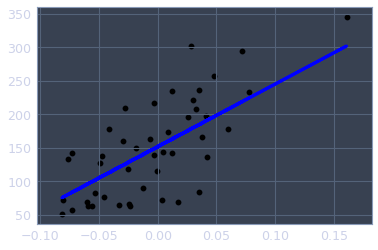

In [28]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()

### Logistics regression

In [30]:
# 讀取鳶尾花資料集
iris = datasets.load_iris()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, random_state=4)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [31]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9333333333333333


## [作業重點]
了解其他資料集的使用方法，如何將資料正確地送進模型訓練

## 練習時間
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

In [8]:
wine = datasets.load_wine()
boston = datasets.load_boston()
breast_cancer = datasets.load_breast_cancer()

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！